<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define Autoencoder Model
input_dim = 10  # Number of input features
encoding_dim = 3  # Compressed representation

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)  # Encoder model

# Compile Autoencoder
autoencoder.compile(optimizer='adam', loss='mse')



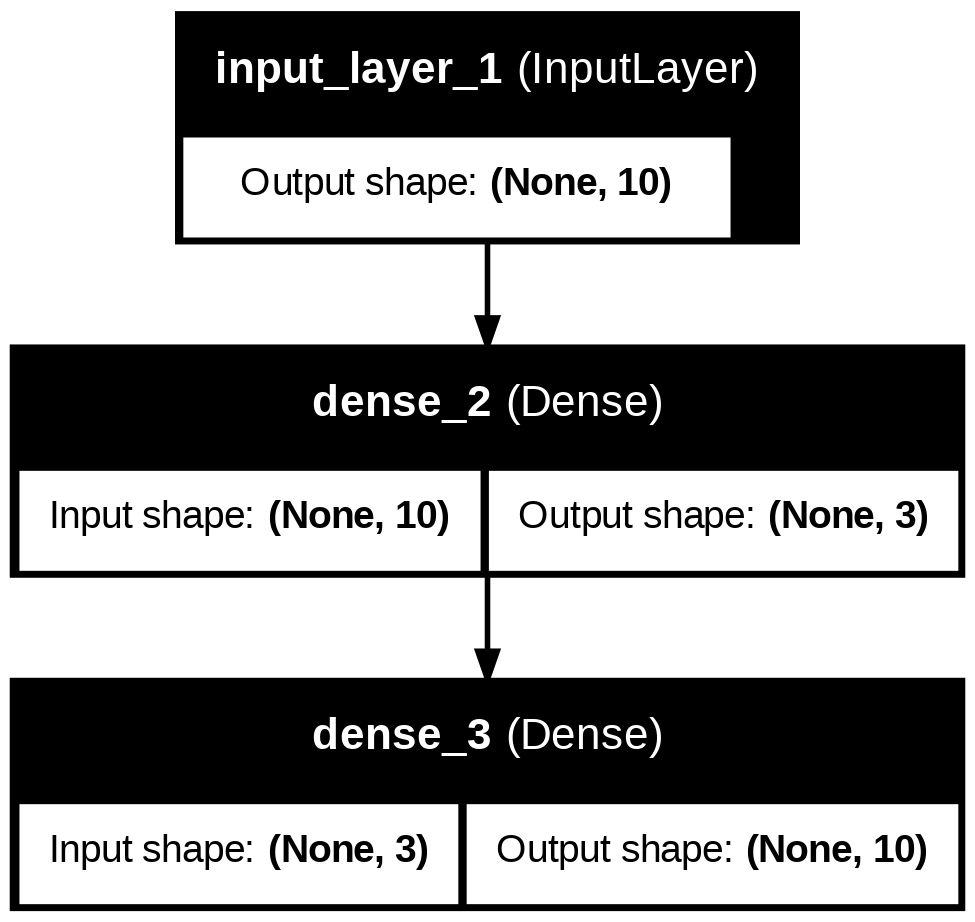

In [3]:
from tensorflow.keras.utils import plot_model
plot_model(autoencoder, to_file='model.png', show_shapes=True, show_layer_names=True)

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Sample Data (Categorical)
data = pd.DataFrame({'Category': ['A', 'B', 'C', 'A', 'C', 'B', 'A', 'C', 'B']})

# One-Hot Encode Categorical Feature
# The 'sparse' argument has been replaced with 'sparse_output'
# We are now assigning it to the variable 'ohe' to prevent name conflicts
ohe = OneHotEncoder(sparse_output=False)
X_onehot = ohe.fit_transform(data[['Category']])

print("One-Hot Encoded Data:\n", X_onehot)

One-Hot Encoded Data:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [6]:
# Define Autoencoder
input_dim = X_onehot.shape[1]  # Number of input features (categories)
encoding_dim = 2  # Compress to 2D representation

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='softmax')(encoded)

# Build Autoencoder Model
autoencoder = Model(input_layer, decoded)
encoder_model = Model(input_layer, encoded)  # Encoder part only

# Compile & Train Autoencoder
autoencoder.compile(optimizer='adam', loss='categorical_crossentropy')
autoencoder.fit(X_onehot, X_onehot, epochs=100, batch_size=4, verbose=0)

# Get Encoded Representations
X_encoded = encoder_model.predict(X_onehot)

print("Encoded Categorical Features:\n", X_encoded)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Encoded Categorical Features:
 [[0.        0.       ]
 [0.        0.       ]
 [0.        1.1295292]
 [0.        0.       ]
 [0.        1.1295292]
 [0.        0.       ]
 [0.        0.       ]
 [0.        1.1295292]
 [0.        0.       ]]


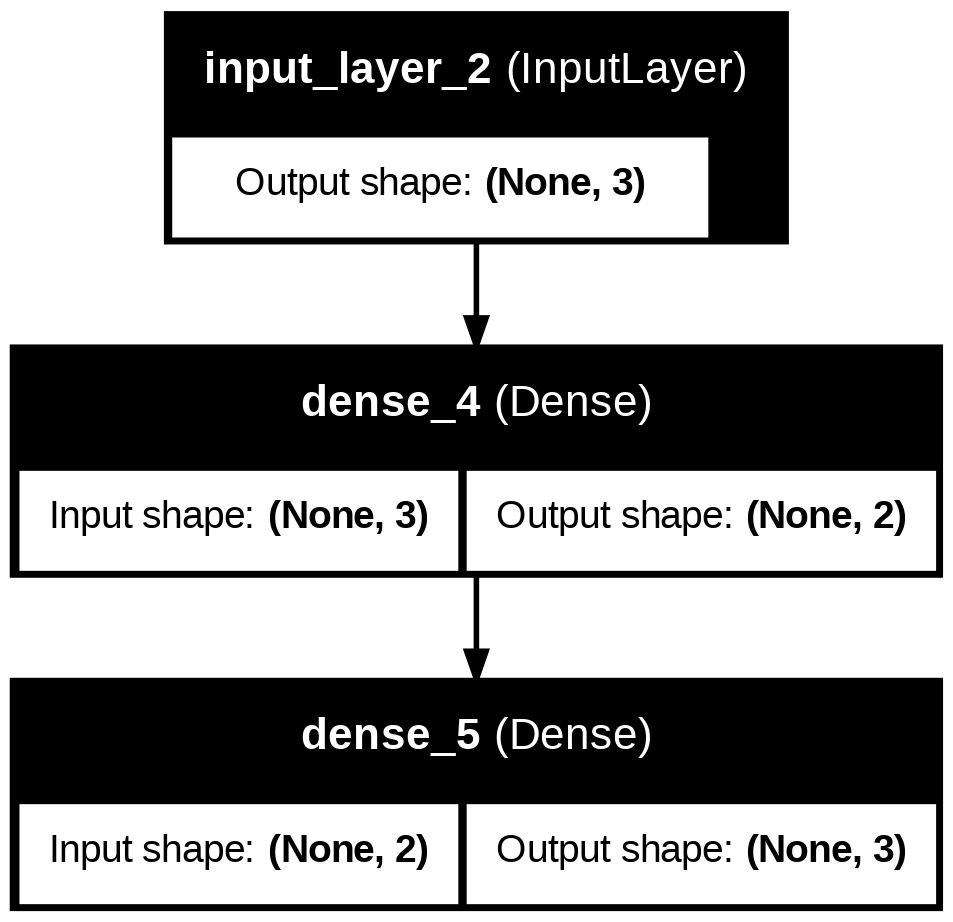

In [7]:
from tensorflow.keras.utils import plot_model
plot_model(autoencoder, to_file='model.png', show_shapes=True, show_layer_names=True)